In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [34]:
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [35]:
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


In [36]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

In [37]:
print(train.shape)
print(test.shape)

(10886, 19)
(6493, 16)


In [38]:
# 머신러닝(랜덤포레스트)를 이용한 퓽속 0값을 대체 
# 풍속 0과 0이 아닌것을 나눈다.
trainwind0 = train.loc[train.windspeed == 0]
trainwindnot0 = train.loc[train.windspeed != 0]
print(trainwind0)
print(trainwindnot0)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10826 2012-12-17 12:00:00       4        0           1        2  16.40   
10829 2012-12-17 15:00:00       4        0           1        2  17.22   
10846 2012-12-18 08:00:00       4        0           1        1  15.58   
10860 2012-12-18 22:00:00       4        0           1        1  13.94   
10862 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81        0.

In [39]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [40]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,NaN,NaN,-0.084427


<AxesSubplot:>

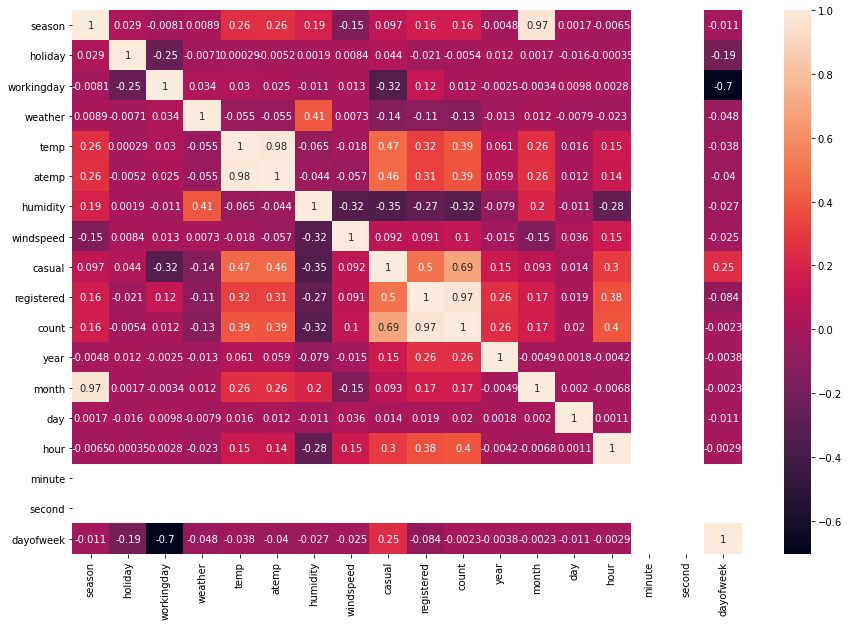

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
def predictWindspeed(data):
    # data의 windspeed열 값 0을 랜덤포레스트 기반 예측값 대체 
    datawind0 = data.loc[data['windspeed'] == 0]
    datawindnot0 = data.loc[data['windspeed'] !=0]

    # 입력 데이터 -> 랜덤포레스트 모델 -> 출력 데이터 
    # 풍속을 예측하는데 사용될 변수(입력)을 선택 
    # 상관계수를 구해보는 것이 좋다. 
    wcol = ['season','weather','temp','atemp','humidity','year','month']
    # 회귀모델 
    # 풍속예측함수 = w1 season + w2 weather + ..... + w7 month + b 
    
    # 출력 데이터 타입이 str이어야 했음
    datawindnot0['windspeed'] = datawindnot0['windspeed'].astype('str')

    # 랜덤 포레스트 분류기
    rfmodelwind = RandomForestClassifier()

    # 모델링 학습 데이터 
    rfmodelwind.fit(datawindnot0[wcol],datawindnot0['windspeed'])

    # 모델 remodelwind 를 활용하여 풍속이 0인 데이터에 풍속을 예측(predict)하자
    wind0values = rfmodelwind.predict(datawind0[wcol])

    predictwind0 = datawind0
    predictwindnot0 = datawindnot0


    # 풍속0을 예측된 값으로 변경한 값이다.
    predictwind0['windspeed'] = wind0values

    data = predictwindnot0.append(predictwind0)

    data.reset_index(inplace = True)
    data.drop('index',inplace = True, axis = 1)
    return data


In [44]:
train = predictWindspeed(train)
test = predictWindspeed(test)

In [45]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  object        
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [57]:
# 연속형 변수 -> 범주형 변수 
category_fn = ['season','holiday','workingday','weather','year','month','hour','dayofweek']

In [58]:
for v in category_fn:
    train[v] = train[v].astype('category')
    test[v] = test[v].astype('category')
    

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  object        
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  minute      10886 non-

In [60]:
from sklearn.metrics import make_scorer

In [63]:
def rmsle(pv,av): # 예측값 실제값
    # 넘파이 배열로 변환
    pv = np.array(pv)
    av = np.array(av)

    # 예측값과 실제값에 1을 더하고 로그를 씌운다.
    log_predict = np.log(pv+1)
    log_actual = np.log(av+1)

    res = log_predict-log_actual
    res = np.square(res)
    mean_res = res.mean()
    score = np.sqrt(mean_res)
    return score 

In [64]:
rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [ ]:
fn = 

In [46]:
for dataset in train_test:
    dataset.windspeed.replace(0,dataset.windspeed.mean(),inplace =True)

NameError: name 'train_test' is not defined